In [1]:
# load packages
import torch
import pandas
import numpy as np
import plotly.express as px
import kaleido
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import legend
from datasets import Dataset
from sklearn.manifold import TSNE

In [2]:
# load distance matrix from file
distance_matrix = torch.load("../data/distance_matrix")

In [25]:
# transform distance matrix to 2-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=2, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=5000, # number of iterations default is 1000
                                early_exaggeration=12.0, # default is 12.0
                                init='random',
                                perplexity=50 # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [6]:
# load distance matrix ids
distance_matrix_ids = torch.load("../data/distance_matrix_ids")

In [7]:
# get shape of transformed matrix
distance_matrix_embedded.shape

(7908, 2)

In [35]:
# print embedded distance matrix
distance_matrix_embedded

array([[ -19.122   ,  -15.534377],
       [ -15.776139,  -76.300476],
       [  -8.955099, -101.21797 ],
       ...,
       [ -11.104919,   15.802686],
       [  46.123592,  -36.95889 ],
       [  87.810165,   42.528385]], dtype=float32)

In [26]:
# turn matrix into pandas data frame
df = pandas.DataFrame(distance_matrix_embedded, columns=['x','y'])

In [27]:
# add ids to data frame
df['id'] = distance_matrix_ids

In [10]:
# load video data
videos = Dataset.load_from_disk("../data/videos")

In [28]:
# add channel to data frame
df['channel'] = videos['channel']

In [29]:
# get colors for channel
colors = []
for d in df['channel']:
    if d == 'Al-Jazeera-English':
        colors.append('orange')
    if d == 'BBC-News':
        colors.append('red')
    if d == 'CCTV-Video-News-Agency':
        colors.append('black')
    if d == 'CNN-News':
        colors.append('purple')
    if d == 'DW-News':
        colors.append('blue')
    if d == 'Fox-News':
        colors.append('darkgreen')
# add them to the data frame
df['colors'] = colors

In [20]:
df

x         y      id             channel     colors
0    -0.163636 -0.055254      28  Al-Jazeera-English     orange
1    -0.234755 -0.034181      29  Al-Jazeera-English     orange
2    -0.242100 -0.005426      88  Al-Jazeera-English     orange
3     0.013733 -0.073712      89  Al-Jazeera-English     orange
4    -0.003451 -0.121895     179  Al-Jazeera-English     orange
...        ...       ...     ...                 ...        ...
7903 -0.132993  0.120704  228295            Fox-News  darkgreen
7904  0.000127  0.019745  228296            Fox-News  darkgreen
7905 -0.019641 -0.008975  228297            Fox-News  darkgreen
7906 -0.131090  0.089050  228298            Fox-News  darkgreen
7907  0.067835  0.123392  228299            Fox-News  darkgreen

[7908 rows x 5 columns]

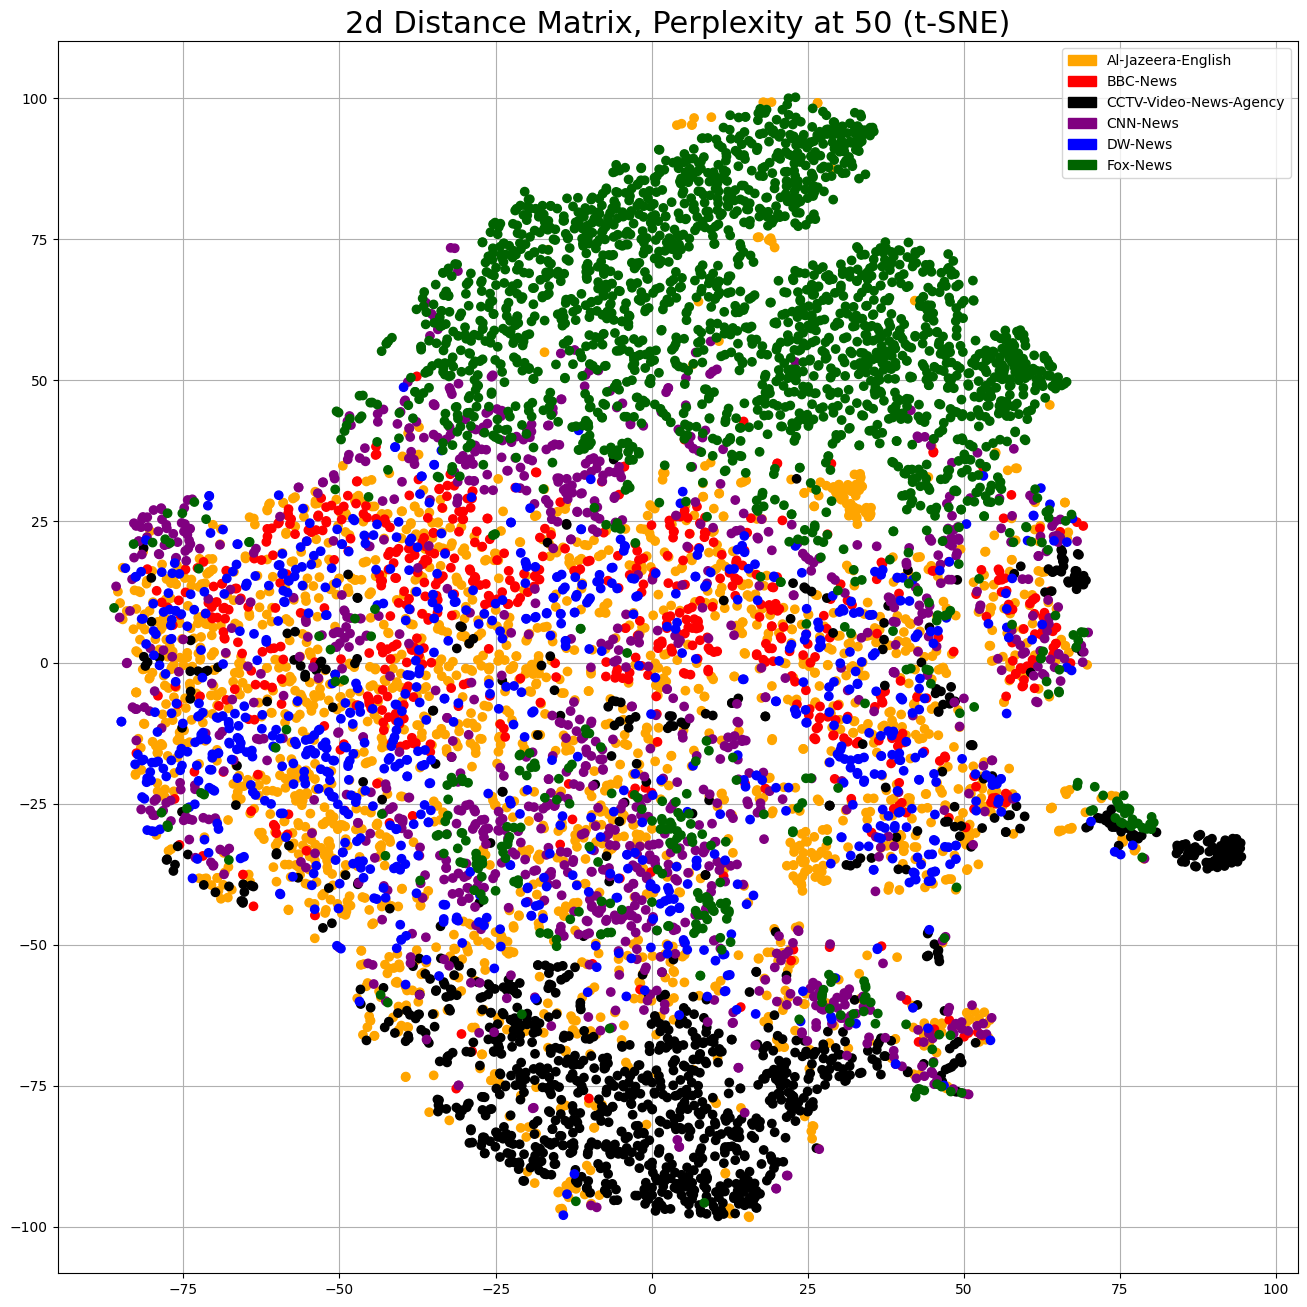

In [30]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label='Al-Jazeera-English')
pop_b = mpatches.Patch(color='red', label='BBC-News')
pop_c = mpatches.Patch(color='black', label='CCTV-Video-News-Agency')
pop_d = mpatches.Patch(color='purple', label='CNN-News')
pop_e = mpatches.Patch(color='blue', label='DW-News')
pop_f = mpatches.Patch(color='darkgreen', label='Fox-News')
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df['x'], df['y'], c=df['colors'])
# add title, legend
plt.title('2d Distance Matrix, Perplexity at 50 (t-SNE)', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e, pop_f])

In [ ]:
perplexity = np.arange(4005, 7805, 200)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(distance_matrix)
    divergence.append(model.kl_divergence_)

In [28]:
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [27]:
# save plot
fig.write_image('../doc/divergence_perplexity_1.png', width=1920, height=1080, engine='kaleido')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


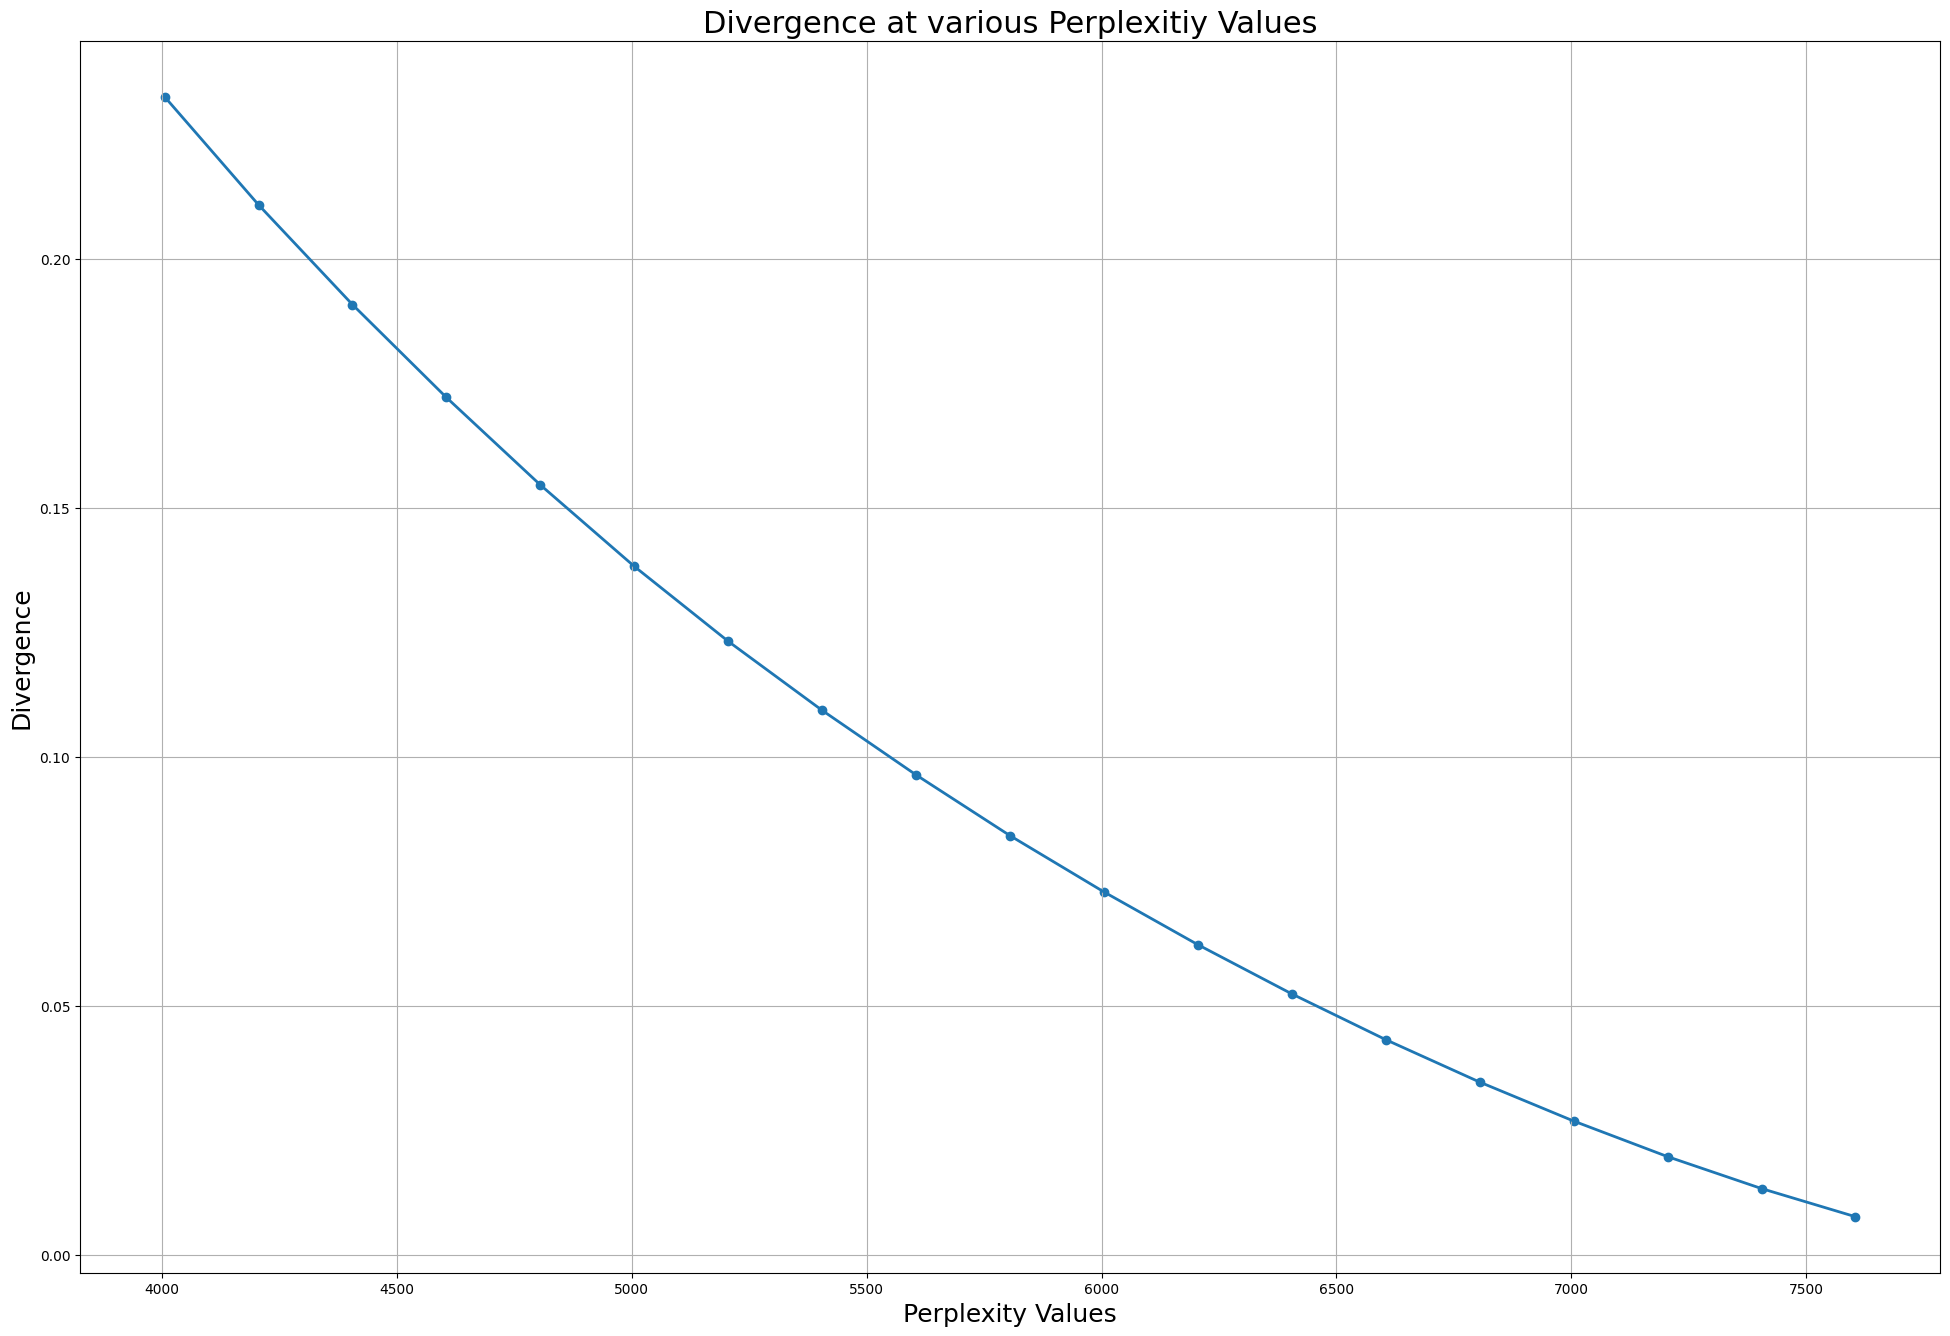

In [29]:
# plot
fig, ax = plt.subplots(figsize=(24,16))
ax.plot(perplexity, divergence, linewidth=2.0)
ax.scatter(perplexity, divergence)
ax.grid()
plt.xlabel('Perplexity Values', fontsize=18)
plt.ylabel('Divergence', fontsize=18)
plt.title('Divergence at various Perplexitiy Values', fontsize=22)
plt.show()